In [71]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.tree import DecisionTreeClassifier
import math
import operator
import random

In [3]:
data_spam = pd.read_csv("C:/Users/mouni/Downloads/SML/HW3/spambase/spambase.data")

In [4]:
data_spam = data_spam.rename(columns={'0':'word_freq_make','0.64':'word_freq_address',
                                      '0.64.1':'word_freq_all','0.1':'word_freq_3d',
                                      '0.32':'word_freq_our','0.2':'word_freq_over',
                                      '0.3':'word_freq_remove','0.4':'word_freq_internet',
                                      '0.5':'word_freq_order','0.6':'word_freq_mail',
                                      '0.7':'word_freq_receive','0.64.2':'word_freq_will','0.8':'word_freq_people',
                                      '0.9':'word_freq_report','0.10':'word_freq_addresses','0.32.1':'word_freq_free',
                                      '0.11':'word_freq_business','1.29':'word_freq_email',
                                      '1.93':'word_freq_you','0.12':'word_freq_credit','0.96':'word_freq_your',
                                      '0.13':'word_freq_font','0.14':'word_freq_000','0.15':'word_freq_money',
                                      '0.16':'word_freq_hp','0.17':'word_freq_hpl','0.18':'word_freq_george',
                                      '0.19':'word_freq_650','0.20':'word_freq_lab','0.21':'word_freq_labs',
                                      '0.22':'word_freq_telnet','0.23':'word_freq_857','0.24':'word_freq_data',
                                      '0.25':'word_freq_415','0.26':'word_freq_85','0.27':'word_freq_technology',
                                      '0.28':'word_freq_1999','0.29':'word_freq_parts','0.30':'word_freq_pm',
                                      '0.31':'word_freq_direct','0.32.2':'word_freq_cs','0.33':'word_freq_meeting',
                                      '0.34':'word_freq_original','0.35':'word_freq_project','0.36':'word_freq_re',
                                      '0.37':'word_freq_edu','0.38':'word_freq_table','0.39':'word_freq_conference',
                                      '0.40':'char_freq_semicolon','0.41':'char_freq_leftparen',
                                      '0.42':'char_freq_leftsquare','0.778':'char_freq_bang',
                                      '0.43':'char_freq_dollar','0.44':'char_freq_hash',
                                      '3.756':'capital_run_length_average','61':'capital_run_length_longest',
                                      '278':'capital_run_length_total','1':'is_spam'})

In [5]:
data_spam.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_semicolon,char_freq_leftparen,char_freq_leftsquare,char_freq_bang,char_freq_dollar,char_freq_hash,capital_run_length_average,capital_run_length_longest,capital_run_length_total,is_spam
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1


In [6]:
data_y = data_spam['is_spam']
data_x = data_spam.drop(columns = ['is_spam'])
data_x.shape

(4600, 57)

In [7]:
scaler = StandardScaler() 
data_scaled = scaler.fit_transform(data_x)
data_scaled.shape

(4600, 57)

In [8]:
df = pd.DataFrame(data=data_scaled[:,0:],
                  index=data_scaled[:,0],
                  columns=['word_freq_make', 'word_freq_address','word_freq_all', 'word_freq_3d', 'word_freq_our',
                           'word_freq_over', 'word_freq_remove', 'word_freq_internet','word_freq_order', 'word_freq_mail',
                           'word_freq_receive','word_freq_will', 'word_freq_people', 'word_freq_report',
                           'word_freq_addresses', 'word_freq_free', 'word_freq_business','word_freq_email',
                           'word_freq_you', 'word_freq_credit', 'word_freq_your','word_freq_font', 'word_freq_000',
                           'word_freq_money', 'word_freq_hp','word_freq_hpl', 'word_freq_george', 'word_freq_650',
                           'word_freq_lab','word_freq_labs', 'word_freq_telnet', 'word_freq_857', 'word_freq_data',
                           'word_freq_415', 'word_freq_85', 'word_freq_technology', 'word_freq_1999','word_freq_parts',
                           'word_freq_pm', 'word_freq_direct', 'word_freq_cs','word_freq_meeting', 'word_freq_original',
                           'word_freq_project', 'word_freq_re', 'word_freq_edu', 'word_freq_table',
                           'word_freq_conference', 'char_freq_semicolon', 'char_freq_leftparen', 'char_freq_leftsquare',
                           'char_freq_bang', 'char_freq_dollar', 'char_freq_hash','capital_run_length_average',
                           'capital_run_length_longest', 'capital_run_length_total'])

In [9]:
df.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_semicolon,char_freq_leftparen,char_freq_leftsquare,char_freq_bang,char_freq_dollar,char_freq_hash,capital_run_length_average,capital_run_length_longest,capital_run_length_total
0.345252,0.345252,0.051976,0.435261,-0.046905,-0.256087,0.672259,0.244655,-0.088058,-0.323341,1.086529,...,-0.111559,-0.158471,-0.026117,-0.155215,0.126330,0.423674,0.008739,-0.002453,0.250546,1.228189
-0.145982,-0.145982,-0.164984,0.851833,-0.046905,1.364700,0.343576,0.193562,0.036609,1.973754,0.016339,...,-0.111559,-0.117398,0.014571,-0.155215,0.008631,0.439942,-0.079768,0.145895,2.220875,3.258376
-0.342475,-0.342475,-0.164984,-0.556576,-0.046905,0.472524,-0.350309,0.500124,1.308212,0.789315,0.605719,...,-0.111559,-0.158471,-0.007622,-0.155215,-0.161788,-0.308392,-0.103060,-0.052154,-0.062450,-0.152207
-0.342475,-0.342475,-0.164984,-0.556576,-0.046905,0.472524,-0.350309,0.500124,1.308212,0.789315,0.605719,...,-0.111559,-0.158471,-0.015020,-0.155215,-0.164240,-0.308392,-0.103060,-0.052154,-0.062450,-0.152207
-0.342475,-0.342475,-0.164984,-0.556576,-0.046905,2.286616,-0.350309,-0.291828,4.350087,-0.323341,-0.371410,...,-0.111559,-0.158471,0.310487,-0.155215,-0.329755,-0.308392,-0.103060,-0.069079,-0.190726,-0.378150


### Problem 1 [Logistic regression]

**1 (a) Split the original data into 75% for training and 25% for testing. Choose the training set at random and ensure that the fraction of SPAM examples in the training set is close to the fraction of 39.4% SPAM examples in the entire dataset. Train a logistic regression model on the training set and output the following on the testing set:**
1. Confusion matrix 
2. True Positives, False Positives, True Negatives, False Negatives
3. Accuracy, Error
4. Precision, Recall, F1 score

In [10]:
xTrain, xTest, yTrain, yTest = train_test_split(df, data_y, test_size = 0.25, random_state = 0)

In [11]:
len(yTrain.loc[yTrain == 1])/len(xTrain)

0.392463768115942

#### Logistic Regression on training data

In [12]:
logisticRegr = LogisticRegression()
fit1 = logisticRegr.fit(xTrain, yTrain)
fit1

C:\Users\mouni\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [13]:
predictions = logisticRegr.predict(xTest)


#### Confusion Matrix

In [14]:
cm = metrics.confusion_matrix(yTest, predictions)
print(cm)
TN = cm[0][0]
FN = cm[1][0]
FP = cm[0][1]
TP = cm[1][1]

[[656  36]
 [ 45 413]]


#### Accuracy score of the model and evalution metrics

In [15]:
score = logisticRegr.score(xTest, yTest)
print(score)

0.9295652173913044


In [16]:
print(metrics.classification_report(yTest, predictions))
print("\nCross entrophy: ", metrics.log_loss(yTest,predictions))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94       692
           1       0.92      0.90      0.91       458

    accuracy                           0.93      1150
   macro avg       0.93      0.92      0.93      1150
weighted avg       0.93      0.93      0.93      1150


Cross entrophy:  2.432756237821959


#### Calculating accuracy, precision and recall using confusion matrix

In [17]:
# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
print("Accuracy:", ACC)

# Recall
recall = TP/(TP+FN)
print("Recall:", recall)

# Precision 
precision = TP/(TP+FP)
print("Precision:", precision)

# Error
print("Error:", 1-ACC)

# F1 Score
f1 = 2*((precision*recall)/(precision+recall))
print("F1 score:", f1)

Accuracy: 0.9295652173913044
Recall: 0.9017467248908297
Precision: 0.9198218262806236
Error: 0.07043478260869562
F1 score: 0.9106945975744211


**1 (b) Print the coefficients of the features in the model. Which features contribute mostly to the prediction? Which ones are positively correlated and which ones are negatively correlated with the SPAM class?**

In [18]:
xTest.columns

Index(['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
       'word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_internet', 'word_freq_order', 'word_freq_mail',
       'word_freq_receive', 'word_freq_will', 'word_freq_people',
       'word_freq_report', 'word_freq_addresses', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you',
       'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
       'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
       'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
       'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
       'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
       'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_original', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word_freq_table', 'word_freq_conference',


In [19]:
coeff = fit1.coef_
coeff[coeff>0]

array([0.0744696 , 1.00509894, 0.32554939, 0.19228165, 0.92593544,
       0.19723677, 0.12351767, 0.06294884, 0.03537821, 0.0268677 ,
       0.28783505, 0.95061687, 0.40331579, 0.06210778, 0.15550624,
       0.38409911, 0.25433162, 0.21443443, 0.79562219, 0.14887934,
       0.24012464, 0.0187023 , 0.3471644 , 0.03334317, 0.05257299,
       0.23197986, 1.14918891, 0.71332883, 2.06528337, 1.76808093,
       0.39388566])

#### The features that contribute mostly to the prediction are 
- capital_run_length_average
- capital_run_length_longest
- char_freq_dollar

#### Positively correlated features with SPAM class

#### Negatively correlated features with SPAM class

**1 (c) Vary the decision threshold T ∈ {0.25, 0.5, 0.75, 0.9} and report for each value the model accuracy, precision, and recall. Comment on how these metrics vary with the choice of threshold.**

#### Threshold = 0.5

In [20]:
prediction_T = logisticRegr.predict_proba(xTest)>= 0.5

prediction_T = prediction_T[:,0]
cm_05 = metrics.confusion_matrix(yTest, prediction_T)
print(cm_05)
TN_05 = cm_05[1][0]
FN_05 = cm_05[0][0]
FP_05 = cm_05[1][1]
TP_05 = cm_05[0][1]


[[ 36 656]
 [413  45]]


In [21]:
# Overall accuracy
ACC_05 = (TP_05+TN_05)/(TP_05+FP_05+FN_05+TN_05)
print("Accuracy:", ACC_05)

# Sensitivity, hit rate, recall, or true positive rate
recall_05 = TP_05/(TP_05+FN_05)
print("Recall:", recall_05)

# Precision or positive predictive value
precision_05 = TP_05/(TP_05+FP_05)
print("Precision:", precision_05)

# Error
print("Error:", 1-ACC_05)

# F1 Score
f1_05 = 2*((precision_05*recall_05)/(precision_05+recall_05))
print("F1 score:", f1_05)

Accuracy: 0.9295652173913044
Recall: 0.9479768786127167
Precision: 0.9358059914407989
Error: 0.07043478260869562
F1 score: 0.9418521177315148


#### Threshold = 0.25

In [22]:
prediction_T = logisticRegr.predict_proba(xTest)>= 0.25

prediction_T = prediction_T[:,0]
cm_25 = metrics.confusion_matrix(yTest, prediction_T)
print(cm_25)
TN_25 = cm_25[1][0]
FN_25 = cm_25[0][0]
FP_25 = cm_25[1][1]
TP_25 = cm_25[0][1]


[[ 15 677]
 [363  95]]


In [23]:
# Overall accuracy
ACC_25 = (TP_25+TN_25)/(TP_25+FP_25+FN_25+TN_25)
print("Accuracy:", ACC_25)

# Sensitivity, hit rate, recall, or true positive rate
recall_25 = TP_25/(TP_25 + FN_25)
print("Recall:", recall_25)

# Precision or positive predictive value
precision_25 = TP_25/(TP_25+FP_25)
print("Precision:", precision_25)

# Error
print("Error:", 1-ACC_25)

# F1 Score
f1_25 = 2*((precision_25*recall_25)/(precision_25+recall_25))
print("F1 score:", f1_25)

Accuracy: 0.9043478260869565
Recall: 0.9783236994219653
Precision: 0.8769430051813472
Error: 0.09565217391304348
F1 score: 0.924863387978142


#### Threshold = 0.75

In [24]:
prediction_T = logisticRegr.predict_proba(xTest)>= 0.75

prediction_T = prediction_T[:,0]
cm_75 = metrics.confusion_matrix(yTest, prediction_T)
print(cm_75)
TN_75 = cm_75[1][0]
FN_75 = cm_75[0][0]
FP_75 = cm_75[1][1]
TP_75 = cm_75[0][1]

[[101 591]
 [445  13]]


In [25]:
# Overall accuracy
ACC_75 = (TP_75+TN_75)/(TP_75+FP_75+FN_75+TN_75)
print("Accuracy:", ACC_75)

# Sensitivity, hit rate, recall, or true positive rate
recall_75 = TP_75/(TP_75+FN_75)
print("Recall:", recall_75)

# Precision or positive predictive value
precision_75 = TP_75/(TP_75+FP_75)
print("Precision:", precision_75)

# Error
print("Error:", 1-ACC_75)

# F1 Score
f1_75 = 2*((precision_75*recall_75)/(precision_75+recall_75))
print("F1 score:", f1_75)

Accuracy: 0.9008695652173913
Recall: 0.8540462427745664
Precision: 0.9784768211920529
Error: 0.09913043478260875
F1 score: 0.912037037037037


#### Threshold = 0.9

In [26]:
prediction_T = logisticRegr.predict_proba(xTest)>= 0.9

prediction_T = prediction_T[:,0]
cm_09 = metrics.confusion_matrix(yTest, prediction_T)
print(cm_09)
TN_09 = cm_09[1][0]
FN_09 = cm_09[0][0]
FP_09 = cm_09[1][1]
TP_09 = cm_09[0][1]

[[228 464]
 [455   3]]


In [27]:
# Overall accuracy
ACC_09 = (TP_09+TN_09)/(TP_09+FP_09+FN_09+TN_09)
print("Accuracy:", ACC_09)

# Sensitivity, hit rate, recall, or true positive rate
recall_09 = TP_09/(TP_09+FN_09)
print("Recall:", recall_09)

# Precision or positive predictive value
precision_09 = TP_09/(TP_09+FP_09)
print("Precision:", precision_09)

# Error
print("Error:", 1-ACC_09)

# F1 Score
f1_09 = 2*((precision_09*recall_09)/(precision_09+recall_09))
print("F1 score:", f1_09)

Accuracy: 0.7991304347826087
Recall: 0.6705202312138728
Precision: 0.9935760171306209
Error: 0.2008695652173913
F1 score: 0.8006902502157032


**1 (d) Use your implementation of gradient descent from Homework 2 and adapt it for logistic regression. Take 3 values of the learning rate and report the cross-entropy loss objective after 10, 50, and 100 iterations. At 100 iterations, report the accuracy and F1 score for the 3 learning rates, and compare with the metrics given by the package.**

- Padding ones to the X variable

In [28]:
X1 = xTrain
X1['ones'] = 1

X2 = xTest
X2['ones'] = 1

C:\Users\mouni\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\mouni\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [29]:
def gradient_descent(X,y,theta,alpha,n):
    
    m = len(y)
        
    for i in range(n):
        prediction = np.dot(X,theta)
        h = 1 / (1 + np.exp(-prediction))
        theta = theta - (1/m) * alpha * (X.T.dot(h - y))
        
    return theta

In [30]:
yTrain_gd = yTrain.to_numpy().reshape(yTrain.shape[0],1)

In [31]:
alpha = 0.01
iter = [10,50,100]
cols = xTrain.columns
theta = np.random.randn(len(cols),1)
theta_df = theta
for i in iter:
    theta_j = gradient_descent(X1,yTrain_gd,theta_df,alpha,i)
    yTest_pred_gd = xTest.dot(theta_j)
    yTest_pred_gd = yTest_pred_gd.to_numpy()
    
    for i in range(len(yTest_pred_gd)):
        if yTest_pred_gd[i]>0.5:
            yTest_pred_gd[i] = 1
        else:
            yTest_pred_gd[i] = 0
            
    print("Cross entrophy: ", metrics.log_loss(yTest,yTest_pred_gd))        
    print("mean squared error on scaled test data (GD):",metrics.mean_squared_error(yTest,yTest_pred_gd))
    print("\nConfusion matrix \n", metrics.confusion_matrix(yTest, yTest_pred_gd))
    print("\nReport: \n",metrics.classification_report(yTest, yTest_pred_gd))
    
    


Cross entrophy:  10.632076141636393
mean squared error on scaled test data (GD): 0.30782608695652175

Confusion matrix 
 [[491 201]
 [153 305]]

Report: 
               precision    recall  f1-score   support

           0       0.76      0.71      0.74       692
           1       0.60      0.67      0.63       458

    accuracy                           0.69      1150
   macro avg       0.68      0.69      0.68      1150
weighted avg       0.70      0.69      0.69      1150

Cross entrophy:  10.24163084675975
mean squared error on scaled test data (GD): 0.2965217391304348

Confusion matrix 
 [[501 191]
 [150 308]]

Report: 
               precision    recall  f1-score   support

           0       0.77      0.72      0.75       692
           1       0.62      0.67      0.64       458

    accuracy                           0.70      1150
   macro avg       0.69      0.70      0.69      1150
weighted avg       0.71      0.70      0.71      1150

Cross entrophy:  9.76108370076818
mean

In [32]:
alpha = 0.1
iter = [10,50,100]
cols = xTrain.columns
theta = np.random.randn(len(cols),1)
theta_df = theta
for i in iter:
    theta_j = gradient_descent(X1,yTrain_gd,theta_df,alpha,i)
    yTest_pred_gd = xTest.dot(theta_j)
    yTest_pred_gd = yTest_pred_gd.to_numpy()
    
    for i in range(len(yTest_pred_gd)):
        if yTest_pred_gd[i]>0.5:
            yTest_pred_gd[i] = 1
        else:
            yTest_pred_gd[i] = 0
    print("Cross entrophy: ", metrics.log_loss(yTest,yTest_pred_gd))            
    print("mean squared error on scaled test data (GD):",metrics.mean_squared_error(yTest,yTest_pred_gd))
    print("confusion matrix \n", metrics.confusion_matrix(yTest, yTest_pred_gd))
    print("report: \n",metrics.classification_report(yTest, yTest_pred_gd))

Cross entrophy:  15.827965779646297
mean squared error on scaled test data (GD): 0.4582608695652174
confusion matrix 
 [[410 282]
 [245 213]]
report: 
               precision    recall  f1-score   support

           0       0.63      0.59      0.61       692
           1       0.43      0.47      0.45       458

    accuracy                           0.54      1150
   macro avg       0.53      0.53      0.53      1150
weighted avg       0.55      0.54      0.54      1150

Cross entrophy:  8.950142009857792
mean squared error on scaled test data (GD): 0.2591304347826087
confusion matrix 
 [[557 135]
 [163 295]]
report: 
               precision    recall  f1-score   support

           0       0.77      0.80      0.79       692
           1       0.69      0.64      0.66       458

    accuracy                           0.74      1150
   macro avg       0.73      0.72      0.73      1150
weighted avg       0.74      0.74      0.74      1150

Cross entrophy:  6.096897719627447
mean squ

In [33]:
alpha = 0.2
iter = [10,50,100]
cols = xTrain.columns
theta = np.random.randn(len(cols),1)
theta_df = theta
for i in iter:
    theta_j = gradient_descent(X1,yTrain_gd,theta_df,alpha,i)
    yTest_pred_gd = xTest.dot(theta_j)
    yTest_pred_gd = yTest_pred_gd.to_numpy()
    
    for i in range(len(yTest_pred_gd)):
        if yTest_pred_gd[i]>0.5:
            yTest_pred_gd[i] = 1
        else:
            yTest_pred_gd[i] = 0
            
    print("Cross entrophy: ", metrics.log_loss(yTest,yTest_pred_gd))            
    print("mean squared error on scaled test data (GD):",metrics.mean_squared_error(yTest,yTest_pred_gd))
    print("confusion matrix \n", metrics.confusion_matrix(yTest, yTest_pred_gd))
    print("report: \n",metrics.classification_report(yTest, yTest_pred_gd))

Cross entrophy:  12.644417333771854
mean squared error on scaled test data (GD): 0.3660869565217391
confusion matrix 
 [[373 319]
 [102 356]]
report: 
               precision    recall  f1-score   support

           0       0.79      0.54      0.64       692
           1       0.53      0.78      0.63       458

    accuracy                           0.63      1150
   macro avg       0.66      0.66      0.63      1150
weighted avg       0.68      0.63      0.63      1150

Cross entrophy:  5.135827067916161
mean squared error on scaled test data (GD): 0.14869565217391303
confusion matrix 
 [[604  88]
 [ 83 375]]
report: 
               precision    recall  f1-score   support

           0       0.88      0.87      0.88       692
           1       0.81      0.82      0.81       458

    accuracy                           0.85      1150
   macro avg       0.84      0.85      0.85      1150
weighted avg       0.85      0.85      0.85      1150

Cross entrophy:  3.7842833092437016
mean s

In [34]:
alpha = [0.01,0.1,0.2]
iter = 100
cols = xTrain.columns
theta = np.random.randn(len(cols),1)
theta_df = theta
for i in alpha:
    theta_j = gradient_descent(X1,yTrain_gd,theta_df,i,iter)
    yTest_pred_gd = xTest.dot(theta_j)
    yTest_pred_gd = yTest_pred_gd.to_numpy()
    
    for j in range(len(yTest_pred_gd)):
        if yTest_pred_gd[j]>0.5:
            yTest_pred_gd[j] = 1
        else:
            yTest_pred_gd[j] = 0
    print("Alpha: ", i)        
    print("Cross entrophy: ", metrics.log_loss(yTest,yTest_pred_gd))                     
    print("mean squared error on scaled test data (GD):",metrics.mean_squared_error(yTest,yTest_pred_gd))
    print("confusion matrix \n", metrics.confusion_matrix(yTest, yTest_pred_gd))
    print("report: \n",metrics.classification_report(yTest, yTest_pred_gd))

Alpha:  0.01
Cross entrophy:  15.497656756887404
mean squared error on scaled test data (GD): 0.44869565217391305
confusion matrix 
 [[321 371]
 [145 313]]
report: 
               precision    recall  f1-score   support

           0       0.69      0.46      0.55       692
           1       0.46      0.68      0.55       458

    accuracy                           0.55      1150
   macro avg       0.57      0.57      0.55      1150
weighted avg       0.60      0.55      0.55      1150

Alpha:  0.1
Cross entrophy:  5.976783008971649
mean squared error on scaled test data (GD): 0.17304347826086958
confusion matrix 
 [[587 105]
 [ 94 364]]
report: 
               precision    recall  f1-score   support

           0       0.86      0.85      0.86       692
           1       0.78      0.79      0.79       458

    accuracy                           0.83      1150
   macro avg       0.82      0.82      0.82      1150
weighted avg       0.83      0.83      0.83      1150

Alpha:  0.2
Cros

### Problem 2 [Comparing classifiers]

**You can use the same training and testing data as in Problem 1. Train the following classifiers using the training data:**
1. Logistic regression
2. LDA
3. kNN
4. Naive Bayes
5. Decision tree

**(a) answer is found at the end of (b) part.**

**(b) Print the accuracy and error metrics for all 5 classifiers on both training and testing data. Which
model is performing best? Which one is performing worst? Write down some observations.**

**Logistic Regression**

In [35]:
logisticRegr = LogisticRegression()
fit1 = logisticRegr.fit(xTrain, yTrain)
fit1

C:\Users\mouni\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [36]:
y_pred_reg = logisticRegr.predict(xTest)
y_pred_reg

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [37]:
print("TESTING:\n")
score = logisticRegr.score(xTest, yTest)
print("Accuracy of the model: ",score)

# Testing with accuracy score
sc = metrics.accuracy_score(yTest, y_pred_reg)

print("\nAccuracy: ",sc)

print("Error: ",1-sc)
cm_reg = metrics.confusion_matrix(yTest, y_pred_reg)
TN_reg = cm_reg[0][0]
FN_reg = cm_reg[1][0]
FP_reg = cm_reg[0][1]
TP_reg = cm_reg[1][1]

print("\nconfusion matrix \n", cm_reg)
print("\nReport:\n",metrics.classification_report(yTest, y_pred_reg))

print("\nTRAINING: \n")

# Testing with Logistic regression score
score = logisticRegr.score(xTrain, yTrain)
print("Accuracy of the model: ",score)
print("Error: ",1-score)

TESTING:

Accuracy of the model:  0.928695652173913

Accuracy:  0.928695652173913
Error:  0.07130434782608697

confusion matrix 
 [[655  37]
 [ 45 413]]

Report:
               precision    recall  f1-score   support

           0       0.94      0.95      0.94       692
           1       0.92      0.90      0.91       458

    accuracy                           0.93      1150
   macro avg       0.93      0.92      0.93      1150
weighted avg       0.93      0.93      0.93      1150


TRAINING: 

Accuracy of the model:  0.9263768115942029
Error:  0.07362318840579707


**Naive Bayes**

In [38]:
nb = GaussianNB()
fit2 = nb.fit(xTrain, yTrain)
fit2

GaussianNB(priors=None, var_smoothing=1e-09)

In [39]:
y_pred_nb = nb.predict(xTest)
y_pred_nb

array([1, 0, 0, ..., 1, 1, 1], dtype=int64)

In [40]:
print("TESTING:\n")
score = nb.score(xTest, yTest)
print("Accuracy of the model: ",score)

# Testing with accuracy score
sc = metrics.accuracy_score(yTest, y_pred_nb)

print("\nAccuracy: ",sc)

print("Error: ",1-sc)
cm_nb = metrics.confusion_matrix(yTest, y_pred_nb)
TN_nb = cm_nb[0][0]
FN_nb = cm_nb[1][0]
FP_nb = cm_nb[0][1]
TP_nb = cm_nb[1][1]

print("\nconfusion matrix \n", cm_nb)
print("\nReport:\n",metrics.classification_report(yTest, y_pred_nb))

print("TRAINING: \n")

# Testing with Logistic regression score
score = nb.score(xTrain, yTrain)
print("Accuracy of the model: ",score)
print("Error: ",1-score)

TESTING:

Accuracy of the model:  0.8243478260869566

Accuracy:  0.8243478260869566
Error:  0.17565217391304344

confusion matrix 
 [[502 190]
 [ 12 446]]

Report:
               precision    recall  f1-score   support

           0       0.98      0.73      0.83       692
           1       0.70      0.97      0.82       458

    accuracy                           0.82      1150
   macro avg       0.84      0.85      0.82      1150
weighted avg       0.87      0.82      0.83      1150

TRAINING: 

Accuracy of the model:  0.8176811594202898
Error:  0.18231884057971015


**Linear Discriminant Analysis**

In [41]:
lda = LDA(n_components=1)
fit3 = lda.fit(xTrain, yTrain)
y_pred_lda = fit3.predict(xTest)

C:\Users\mouni\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [42]:
print("TESTING:\n")
score = lda.score(xTest, yTest)
print("Accuracy of the model: ",score)

# Testing with accuracy score
sc = metrics.accuracy_score(yTest, y_pred_lda)
print("\nAccuracy: ",sc)

print("Error: ",1-sc)

cm_lda = metrics.confusion_matrix(yTest, y_pred_lda)
TN_lda = cm_lda[0][0]
FN_lda = cm_lda[1][0]
FP_lda = cm_lda[0][1]
TP_lda = cm_lda[1][1]

print("\nconfusion matrix \n", cm_nb)
print("\nReport:\n",metrics.classification_report(yTest, y_pred_lda))

print("TRAINING: \n")

# Testing with Logistic regression score
score = lda.score(xTrain, yTrain)
print("Accuracy of the model: ",score)
print("Error: ",1-score)

TESTING:

Accuracy of the model:  0.8947826086956522

Accuracy:  0.8947826086956522
Error:  0.10521739130434782

confusion matrix 
 [[502 190]
 [ 12 446]]

Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92       692
           1       0.93      0.79      0.86       458

    accuracy                           0.89      1150
   macro avg       0.90      0.88      0.89      1150
weighted avg       0.90      0.89      0.89      1150

TRAINING: 

Accuracy of the model:  0.8855072463768116
Error:  0.11449275362318845


**Decision Tree**

In [43]:
classifier_tree = DecisionTreeClassifier()
classifier_tree.fit(xTrain, yTrain)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [44]:
y_pred_dtree = classifier_tree.predict(xTest)

In [45]:
print("TESTING:\n")
score = classifier_tree.score(xTest, yTest)
print("Accuracy of the model: ",score)

# Testing with accuracy score
sc = metrics.accuracy_score(yTest, y_pred_dtree)

print("\nAccuracy: ",sc)

print("Error: ",1-sc)

cm_tree = metrics.confusion_matrix(yTest, y_pred_dtree)
TN_tree = cm_tree[0][0]
FN_tree = cm_tree[1][0]
FP_tree = cm_tree[0][1]
TP_tree = cm_tree[1][1]

print("\nconfusion matrix \n", cm_tree)
print("\nReport:\n",metrics.classification_report(yTest, y_pred_dtree))

print("TRAINING:")

# Testing with Logistic regression score
score = classifier_tree.score(xTrain, yTrain)
print("\nAccuracy of the model: ",score)
print("Error: ",1-score)

TESTING:

Accuracy of the model:  0.8947826086956522

Accuracy:  0.8947826086956522
Error:  0.10521739130434782

confusion matrix 
 [[631  61]
 [ 60 398]]

Report:
               precision    recall  f1-score   support

           0       0.91      0.91      0.91       692
           1       0.87      0.87      0.87       458

    accuracy                           0.89      1150
   macro avg       0.89      0.89      0.89      1150
weighted avg       0.89      0.89      0.89      1150

TRAINING:

Accuracy of the model:  0.9991304347826087
Error:  0.0008695652173913437


**K Nearest Neighbours**

In [46]:
classifier = KNeighborsClassifier(n_neighbors=10)
classifier.fit(xTrain, yTrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [47]:
y_pred_knn = classifier.predict(xTest)
y_pred_knn

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [48]:
print("TESTING:\n")
score = classifier.score(xTest, yTest)
print("Accuracy of the model: ",score)

# Testing with accuracy score
sc = metrics.accuracy_score(yTest, y_pred_knn)

print("\nAccuracy: ",sc)
print("Error: ",1-sc)

cm_knn = metrics.confusion_matrix(yTest, y_pred_knn)
TN_knn = cm_knn[0][0]
FN_knn = cm_knn[1][0]
FP_knn = cm_knn[0][1]
TP_knn = cm_knn[1][1]

print("\nconfusion matrix \n", cm_knn)
print("\nReport:\n",metrics.classification_report(yTest, y_pred_knn))

print("TRAINING: \n")

# Testing with Logistic regression score
score = classifier.score(xTrain, yTrain)
print("Accuracy of the model: ",score)
print("Error: ",1-score)

TESTING:

Accuracy of the model:  0.9113043478260869

Accuracy:  0.9113043478260869
Error:  0.08869565217391306

confusion matrix 
 [[662  30]
 [ 72 386]]

Report:
               precision    recall  f1-score   support

           0       0.90      0.96      0.93       692
           1       0.93      0.84      0.88       458

    accuracy                           0.91      1150
   macro avg       0.91      0.90      0.91      1150
weighted avg       0.91      0.91      0.91      1150

TRAINING: 

Accuracy of the model:  0.9127536231884058
Error:  0.0872463768115942


**(a) Experiment with different values of k for kNN and report 2 metrics on the training and testing sets: accuracy and error. Choose the value of k that gives the highest accuracy in testing.**

In [49]:
error = []

# Calculating error for K values between 1 and 50
for i in range(1, 50):
    classifier = KNeighborsClassifier(n_neighbors=i)
    classifier.fit(xTrain, yTrain)
    pred_knn = classifier.predict(xTest)
    error.append(np.mean(pred_knn != yTest))
    
    sc = metrics.accuracy_score(yTest, pred_knn)
    print("K value: ", i)
    print("Accuracy: ",sc)
    print("Error: ",1-sc)
    

K value:  1
Accuracy:  0.908695652173913
Error:  0.09130434782608698
K value:  2
Accuracy:  0.8930434782608696
Error:  0.1069565217391304
K value:  3
Accuracy:  0.9113043478260869
Error:  0.08869565217391306
K value:  4
Accuracy:  0.9008695652173913
Error:  0.09913043478260875
K value:  5
Accuracy:  0.9130434782608695
Error:  0.08695652173913049
K value:  6
Accuracy:  0.9130434782608695
Error:  0.08695652173913049
K value:  7
Accuracy:  0.9121739130434783
Error:  0.08782608695652172
K value:  8
Accuracy:  0.9069565217391304
Error:  0.09304347826086956
K value:  9
Accuracy:  0.9121739130434783
Error:  0.08782608695652172
K value:  10
Accuracy:  0.9113043478260869
Error:  0.08869565217391306
K value:  11
Accuracy:  0.9156521739130434
Error:  0.08434782608695657
K value:  12
Accuracy:  0.9121739130434783
Error:  0.08782608695652172
K value:  13
Accuracy:  0.9156521739130434
Error:  0.08434782608695657
K value:  14
Accuracy:  0.9130434782608695
Error:  0.08695652173913049
K value:  15
Accu

Text(0, 0.5, 'Mean Squared Error')

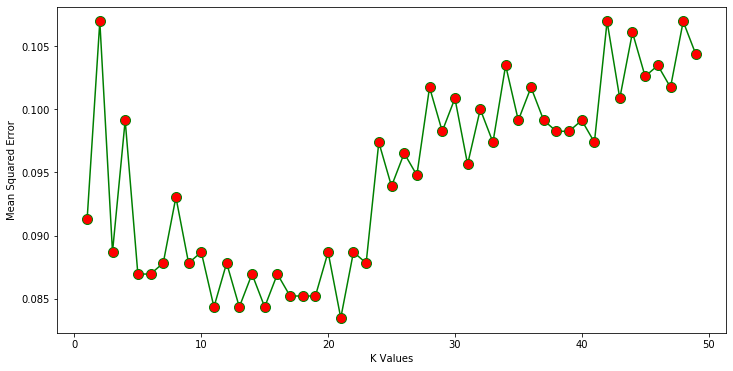

In [50]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 50), error, color='green', marker='o',
         markerfacecolor='red', markersize=10)
plt.xlabel('K Values')
plt.ylabel('Mean Squared Error')

**From the output we can see that the mean error is minimum when the value of the K is between 10 and 22.** 

**For k =11**

In [51]:
classifier = KNeighborsClassifier(n_neighbors=11)
classifier.fit(xTrain, yTrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                     weights='uniform')

In [52]:
y_pred_knn_10 = classifier.predict(xTest)
y_pred_knn_10

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [53]:
print("TESTING: \n")
score = classifier.score(xTest, yTest)
print("Accuracy of the model: ",score)
sc = metrics.accuracy_score(yTest, y_pred_knn)

print("\nAccuracy: ",sc)
print("Error: ",1-sc)
print("confusion matrix \n", metrics.confusion_matrix(yTest, y_pred_knn_10))
print("report: \n",metrics.classification_report(yTest, y_pred_knn_10))

print("TRAINING: \n")
score = classifier.score(xTrain, yTrain)
print("Accuracy of the model: ",score)
print("Error: ",1-score)

TESTING: 

Accuracy of the model:  0.9156521739130434

Accuracy:  0.9113043478260869
Error:  0.08869565217391306
confusion matrix 
 [[656  36]
 [ 61 397]]
report: 
               precision    recall  f1-score   support

           0       0.91      0.95      0.93       692
           1       0.92      0.87      0.89       458

    accuracy                           0.92      1150
   macro avg       0.92      0.91      0.91      1150
weighted avg       0.92      0.92      0.92      1150

TRAINING: 

Accuracy of the model:  0.9159420289855073
Error:  0.08405797101449275


**For k = 21**

In [54]:
classifier = KNeighborsClassifier(n_neighbors=21)
classifier.fit(xTrain, yTrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=21, p=2,
                     weights='uniform')

In [55]:
y_pred_knn_21 = classifier.predict(xTest)
y_pred_knn_21

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [56]:
print("TESTING: \n")
score = classifier.score(xTest, yTest)
print("Accuracy of the model: ",score)
sc = metrics.accuracy_score(yTest, y_pred_knn)
print("\nAccuracy: ",sc)
print("Error: ",1-sc)

print("\nconfusion matrix \n", metrics.confusion_matrix(yTest, y_pred_knn_21))
print("\nReport: \n",metrics.classification_report(yTest, y_pred_knn_21))

print("TRAINING: \n")
score = classifier.score(xTrain, yTrain)

print("Accuracy of the model: ",score)
print("Error: ",1-score)

TESTING: 

Accuracy of the model:  0.9165217391304348

Accuracy:  0.9113043478260869
Error:  0.08869565217391306

confusion matrix 
 [[665  27]
 [ 69 389]]

Report: 
               precision    recall  f1-score   support

           0       0.91      0.96      0.93       692
           1       0.94      0.85      0.89       458

    accuracy                           0.92      1150
   macro avg       0.92      0.91      0.91      1150
weighted avg       0.92      0.92      0.92      1150

TRAINING: 

Accuracy of the model:  0.9060869565217391
Error:  0.0939130434782609


**(c) Generate a graph that includes 5 ROC curves (one for each of the 5 classifiers) on the testing set.
Compute the Area Under the Curve (AUC) metric for all 5 classifiers.**

In [57]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

**Logistic Regression**

AUC: 0.92


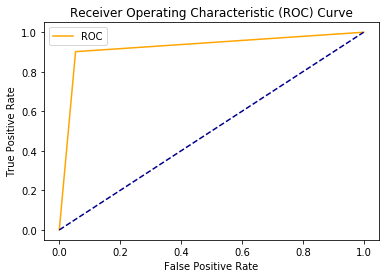

In [58]:
auc = roc_auc_score(yTest, y_pred_reg)
print('AUC: %.2f' % auc)

fpr, tpr, thresholds = roc_curve(yTest, y_pred_reg)

plot_roc_curve(fpr, tpr)

**LDA**

AUC: 0.88


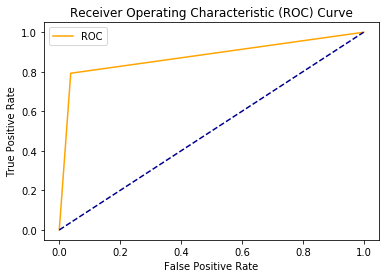

In [59]:
auc = roc_auc_score(yTest, y_pred_lda)
print('AUC: %.2f' % auc)

fpr, tpr, thresholds = roc_curve(yTest, y_pred_lda)

plot_roc_curve(fpr, tpr)

**K Nearest Neighbours**

AUC: 0.90


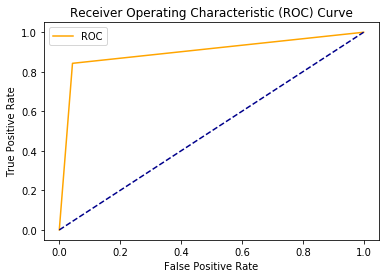

In [60]:
auc = roc_auc_score(yTest, y_pred_knn)
print('AUC: %.2f' % auc)

fpr, tpr, thresholds = roc_curve(yTest, y_pred_knn)

plot_roc_curve(fpr, tpr)

**Naive Bayes**

AUC: 0.85


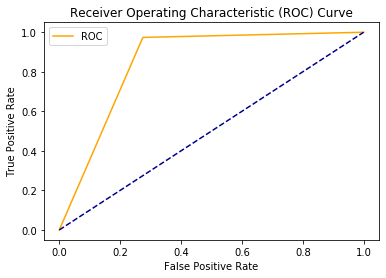

In [61]:
auc = roc_auc_score(yTest, y_pred_nb)
print('AUC: %.2f' % auc)

fpr, tpr, thresholds = roc_curve(yTest, y_pred_nb)

plot_roc_curve(fpr, tpr)

**Decision Tree**

AUC: 0.89


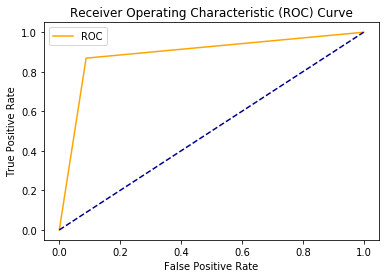

In [62]:
auc = roc_auc_score(yTest, y_pred_dtree)
print('AUC: %.2f' % auc)

fpr, tpr, thresholds = roc_curve(yTest, y_pred_dtree)

plot_roc_curve(fpr, tpr)

In [80]:
# df1 = df.head(100)
# data_y1 = data_y.head(100)
i_data = df.values.T.tolist()
y_data = data_y.tolist()
from sklearn.utils import shuffle
i_data = shuffle(i_data)
data_y = shuffle(data_y)


In [81]:
xTrain, xTest, yTrain, yTest = train_test_split(i_data, data_y, test_size = 0.25, random_state = 0)

ValueError: Found input variables with inconsistent numbers of samples: [57, 100]

In [82]:
# calculate the Euclidean distance between two vectors
def euclidean_distance(row1, row2):
    distance = 0.0
    for i in range(len(row1)-1):
        distance += (row1[i] - row2[i])**2
    return sqrt(distance)

In [82]:
def knn(traindata, testdata, k):
 
    distances = {}
    sort = {}
 
    length = testdata.shape[1]
    
    # Calculating euclidean distance between each row of training data and test data
    for x in range(len(traindata)):
        
        dist = euclideanDistance(testdata, traindata.iloc[x], length)

        distances[x] = dist[0]
    # Sorting them on the basis of distance
    sorted_d = sorted(distances.items(), key=operator.itemgetter(1))
    
    neighbors = []
    
    # Extracting top k neighbors
    for x in range(k):
        neighbors.append(sorted_d[x][0])
    classVotes = {}
    
    # Calculating the most freq class in the neighbors
    for x in range(len(neighbors)):
        response = traindata.iloc[neighbors[x]][-1]
 
        if response in classVotes:
            classVotes[response] += 1
        else:
            classVotes[response] = 1
    sortedVotes = sorted(classVotes.items(), key=operator.itemgetter(1), reverse=True)
    return(sortedVotes[0][0], neighbors)

In [84]:
def knn_predict(test_data, train_data, k_value):
    for i in test_data:
        eu_Distance =[]
        knn = []
        good = 0
        bad = 0
        for j in train_data:
            eu_dist = euclidean_distance(i, j)
            eu_Distance.append((j[5], eu_dist))
            eu_Distance.sort(key = operator.itemgetter(1))
            knn = eu_Distance[:k_value]
            for k in knn:
                if k[0] =='g':
                    good += 1
                else:
                    bad +=1
        if good > bad:
            i.append('g')
        elif good < bad:
            i.append('b')
        else:
            i.append('NaN')

In [ ]:
def accuracy(test_data):
    correct = 0
    for i in test_data:
        if i[5] == i[6]:
            correct += 1
 
    accuracy = float(correct)/len(test_data) *100  
    return accuracy

In [85]:
knn_predict(xTest, xTrain,5)   
print("Accuracy : ",accuracy(yTest))

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [86]:
from random import seed
from random import randrange
 
# Split a dataset into k folds
def cross_validation_split(data_x, folds=5):

    dataset_split = list()
    dataset_copy = list(dataset)
    fold_size = int(len(dataset) / folds)
    for i in range(folds):
        fold = list()
        while len(fold) < fold_size:
            index = randrange(len(dataset_copy))
            fold.append(dataset_copy.pop(index))
        dataset_split.append(fold)
    return dataset_split

In [87]:
i_data = xTrain.values.T.tolist()

In [91]:
dataset = i_data
folds = cross_validation_split(dataset, 4)
print(folds)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

